In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pybaseball import batting_stats_range
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
# Load the CSV files into Pandas DataFrames
al_allstats = pd.read_csv('Resources/al_allstats.csv', delimiter=',')
al_dh_stats = pd.read_csv('Resources/al_dh_stats.csv', delimiter=',')
nl_allstats = pd.read_csv('Resources/nl_allstats.csv', delimiter=',')
nl_dh_stats = pd.read_csv('Resources/nl_dh_stats.csv', delimiter=',')

In [24]:
# Calculate 'SLG' Slugging percentage, based on the provided formula
al_allstats['SLG'] = (al_allstats['1B'] + 2 * al_allstats['2B'] + 3 * al_allstats['3B'] + 4 * al_allstats['HR']) / al_allstats['AB']
nl_allstats['SLG'] = (nl_allstats['1B'] + 2 * nl_allstats['2B'] + 3 * nl_allstats['3B'] + 4 * nl_allstats['HR']) / nl_allstats['AB']


In [25]:
# Calculate 'OBP' On Base Percentage, based on the provided formula
al_allstats['OBP'] = (al_allstats['H'] + al_allstats['BB'] + al_allstats['HBP']) / (al_allstats['AB'] + al_allstats['BB'] + al_allstats['HBP'] + al_allstats['SF'])
nl_allstats['OBP'] = (nl_allstats['H'] + nl_allstats['BB'] + nl_allstats['HBP']) / (nl_allstats['AB'] + nl_allstats['BB'] + nl_allstats['HBP'] + nl_allstats['SF'])


In [26]:
# Add a virtual 'Year' column based on the range of years covered by the data
num_rows = len(al_allstats)
al_allstats['Year'] = np.tile(np.arange(2013, 2024), num_rows // 11 + 1)[:num_rows]
al_dh_stats['Year'] = np.tile(np.arange(2013, 2024), num_rows // 11 + 1)[:num_rows]
nl_allstats['Year'] = np.tile(np.arange(2013, 2024), num_rows // 11 + 1)[:num_rows]
nl_dh_stats['Year'] = np.tile(np.arange(2013, 2024), num_rows // 11 + 1)[:num_rows]


In [27]:
# Analyze Trends in Team Performance for AL
team_metrics = ['R', 'AVG', 'OBP', 'SLG', 'SB', 'SF', 'SH']
al_team_metrics_df = al_allstats.groupby('Year')[team_metrics].mean()

In [31]:
# Analyze Trends in Team Performance for NL
nl_team_metrics_df = nl_allstats.groupby('Year')[team_metrics].mean()

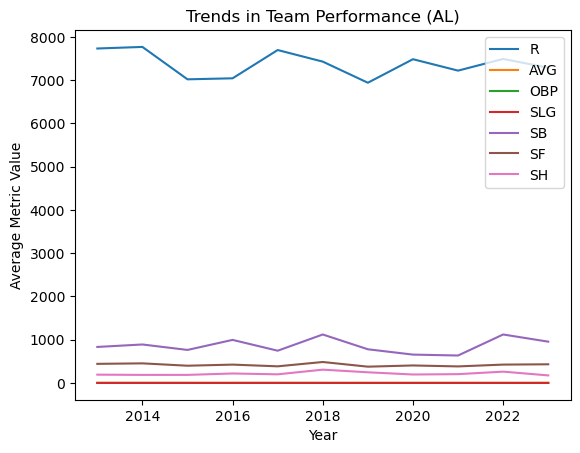

In [29]:
# Visualize Trends in Team Performance for AL
al_team_metrics_df.plot(title='Trends in Team Performance (AL)')
plt.xlabel('Year')
plt.ylabel('Average Metric Value')
plt.legend(loc='upper right')
plt.show()


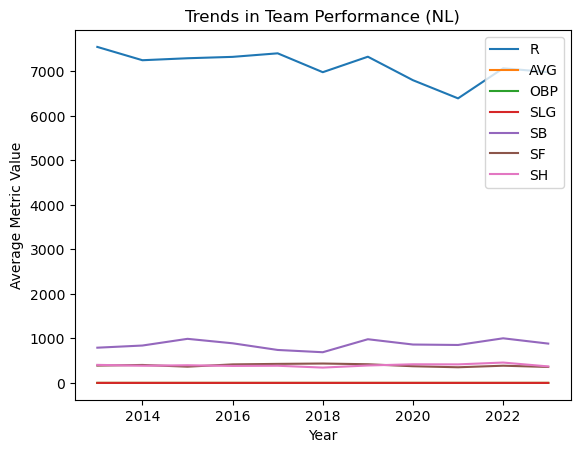

In [33]:
# Visualize Trends in Team Performance for NL
nl_team_metrics_df.plot(title='Trends in Team Performance (NL)')
plt.xlabel('Year')
plt.ylabel('Average Metric Value')
plt.legend(loc='upper right')
plt.show()

In [34]:
# Prepare features and target variables
dh_features = ['HR', 'RBI', 'BB', 'SO', 'AVG']
dh_target = 'R'
X_dh = al_dh_stats[dh_features]
y_dh = al_dh_stats[dh_target]

In [35]:
# Split the data into training and testing sets
X_train_dh, X_test_dh, y_train_dh, y_test_dh = train_test_split(X_dh, y_dh, test_size=0.2, random_state=42)


In [36]:
# Build and train a linear regression model
dh_model = LinearRegression()
dh_model.fit(X_train_dh, y_train_dh)

LinearRegression()

In [37]:
# Make predictions
y_pred_dh = dh_model.predict(X_test_dh)
print(y_pred_dh)

[ 987.34645788  791.91728253 1114.4975189 ]


In [38]:
# Calculate mean squared error
mse_dh = mean_squared_error(y_test_dh, y_pred_dh)
# Print the results
print(f'Mean Squared Error: {mse_dh}')

Mean Squared Error: 4181.518897401508


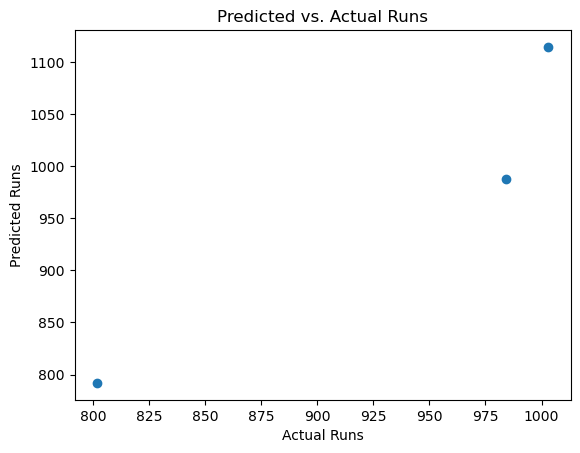

In [39]:
# Visualize the predicted vs. actual values
# Make predictions using the model
y_pred_dh = dh_model.predict(X_test_dh)

plt.scatter(y_test_dh, y_pred_dh)
plt.xlabel('Actual Runs')
plt.ylabel('Predicted Runs')
plt.title('Predicted vs. Actual Runs')
plt.show()

In [40]:
# Analyze Trends in Team Performance
team_metrics = ['R', 'AVG', 'OBP', 'SLG', 'SB', 'SF', 'SH']
team_metrics_df = al_allstats.groupby('Year')[team_metrics].mean()

In [41]:
# Filter NL team offensive stats for the year 2022
nl_team_stats_2022 = nl_allstats[nl_allstats['Year'] == 2022]
nl_dh_team_stats_2022 = nl_dh_stats[nl_dh_stats['Year'] == 2022]

In [43]:
# Calculate 'SLG' based on the provided formula for NL (only for designated hitter teams)
nl_dh_team_stats_2022['SLG'] = (nl_dh_team_stats_2022['1B'] + 2 * nl_dh_team_stats_2022['2B'] +
                                 3 * nl_dh_team_stats_2022['3B'] + 4 * nl_dh_team_stats_2022['HR']) / nl_dh_team_stats_2022['AB']

# Calculate 'OBP' based on the provided formula for NL (only for designated hitter teams)
nl_dh_team_stats_2022['OBP'] = (nl_dh_team_stats_2022['H'] + nl_dh_team_stats_2022['BB'] +
                                 nl_dh_team_stats_2022['HBP']) / (nl_dh_team_stats_2022['AB'] +
                                                                  nl_dh_team_stats_2022['BB'] +
                                                                  nl_dh_team_stats_2022['HBP'] +
                                                                  nl_dh_team_stats_2022['SF'])


C:\Users\DAlfo\AppData\Local\Temp\ipykernel_30076\1554942952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl_dh_team_stats_2022['SLG'] = (nl_dh_team_stats_2022['1B'] + 2 * nl_dh_team_stats_2022['2B'] +
C:\Users\DAlfo\AppData\Local\Temp\ipykernel_30076\1554942952.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl_dh_team_stats_2022['OBP'] = (nl_dh_team_stats_2022['H'] + nl_dh_team_stats_2022['BB'] +


In [44]:
# Calculate average offensive stats for NL teams in 2022
avg_offensive_stats_2022 = nl_team_stats_2022[['R', 'AVG', 'OBP', 'SLG']].mean()
avg_dh_offensive_stats_2022 = nl_dh_team_stats_2022[['R', 'AVG', 'OBP', 'SLG']].mean()


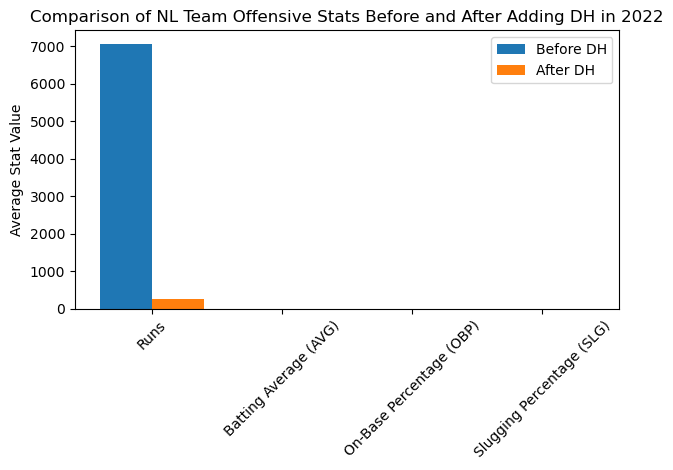

In [45]:
# Create a bar chart to compare average offensive stats before and after adding DH in 2022
fig, ax = plt.subplots()
stats_labels = ['Runs', 'Batting Average (AVG)', 'On-Base Percentage (OBP)', 'Slugging Percentage (SLG)']
x = range(len(stats_labels))
ax.bar(x, avg_offensive_stats_2022, width=0.4, align='center', label='Before DH')
ax.bar([i + 0.4 for i in x], avg_dh_offensive_stats_2022, width=0.4, align='center', label='After DH')
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(stats_labels, rotation=45)
ax.set_title('Comparison of NL Team Offensive Stats Before and After Adding DH in 2022')
ax.set_ylabel('Average Stat Value')
ax.legend()
plt.tight_layout()
plt.show()

In [46]:
# Create a binary target variable for improvement (1) or no improvement (0)
nl_dh_team_stats_2022['Improved'] = (nl_dh_team_stats_2022['R'] > avg_offensive_stats_2022['R']) * 1

# Define features and target variable
features = ['AVG', 'OBP', 'SLG']
target = 'Improved'

X = nl_dh_team_stats_2022[features]
y = nl_dh_team_stats_2022[target]



C:\Users\DAlfo\AppData\Local\Temp\ipykernel_30076\2026578718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nl_dh_team_stats_2022['Improved'] = (nl_dh_team_stats_2022['R'] > avg_offensive_stats_2022['R']) * 1


In [47]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
# Choose a classification model (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

In [56]:
from pybaseball import batting_stats_bref
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
#collect historic team batting data from pybaseball
batting_data = batting_stats_bref(2023)

In [64]:
batting_data.head()

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID
1,CJ Abrams,22,2,Maj-NL,Washington,116,456,420,60,105,...,3,1,6,33,3,0.250,0.302,0.407,0.710,682928
2,Jos\xc3\xa9 Abreu,36,13,Maj-AL,Houston,110,464,423,43,99,...,0,5,12,0,1,0.234,0.291,0.343,0.634,547989
3,Ronald Acuna Jr.,25,1,Maj-NL,Atlanta,124,573,497,113,165,...,0,2,12,55,10,0.332,0.417,0.567,0.985,660670
4,Willy Adames,27,2,Maj-NL,Milwaukee,113,486,426,51,90,...,0,5,9,4,3,0.211,0.296,0.387,0.683,642715
5,Jordyn Adams,23,3,Maj-AL,Los Angeles,10,14,14,0,2,...,0,0,0,0,0,0.143,0.143,0.143,0.286,677941


In [65]:
batting_data.tail()

,Name,Age,#days,Lev,Tm,G,PA,AB,R,H,...,SH,SF,GDP,SB,CS,BA,OBP,SLG,OPS,mlbID
641,Juan Yepez,25,79,Maj-NL,St. Louis,20,46,42,5,9,...,0,0,0,0,1,0.214,0.283,0.381,0.664,660766
642,Masataka Yoshida,29,1,Maj-AL,Boston,110,468,429,61,127,...,0,2,15,8,0,0.296,0.350,0.462,0.812,807799
643,Jared Young,27,35,Maj-NL,Chicago,13,39,35,7,6,...,0,0,1,2,0,0.171,0.256,0.371,0.628,676724
644,Seby Zavala,29,20,Maj-AL,Chicago,66,176,161,15,25,...,2,2,4,1,0,0.155,0.207,0.304,0.511,664874
645,Mike Zunino,32,69,Maj-AL,Cleveland,42,140,124,11,22,...,0,0,3,0,0,0.177,0.271,0.307,0.578,572287


In [70]:
#from pybaseball import batting_stats_range

# retrieve all players' batting stats for the month of May, 2017 
data = batting_stats_range("2020-05-01", "2023-05-28")

# retrieve batting stats for only August 24, 2016
#data = batting_stats_range("2016-08-24",)

IndexError: list index out of range